In [44]:
import math
import matplotlib.pyplot as plt
import os
import pandas as pd

In [30]:
data_folder = "../0_data/1_raw_data"

## Examine the business dataset

In [8]:
business = pd.read_json(os.path.join(data_folder,
                            "business.json"), lines=True)

In [9]:
business.shape

(192609, 14)

In [10]:
business.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [23]:
business["postal_code_trunc"] = business["postal_code"].apply(
    lambda x: x[:3])

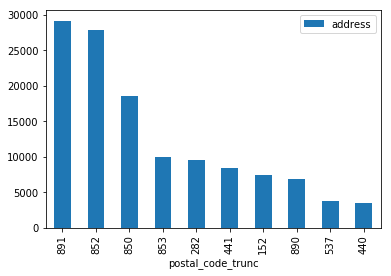

In [29]:
business.groupby(
    "postal_code_trunc").agg(
    "count").sort_values(
    "address", ascending=False).head(
    10)[["address"]].plot.bar()

### Look at average review count

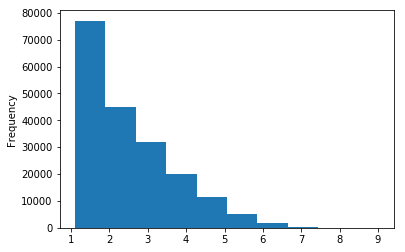

In [37]:
business["review_count"].apply(lambda x: math.log(x)).plot.hist()

In [38]:
business["review_count"].describe()

count    192609.000000
mean         33.538962
std         110.135224
min           3.000000
25%           4.000000
50%           9.000000
75%          25.000000
max        8348.000000
Name: review_count, dtype: float64

#### Will need to take into account whether a business is open or closed.

### Look at average stars

In [39]:
business["stars"].describe()

count    192609.000000
mean          3.585627
std           1.018458
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

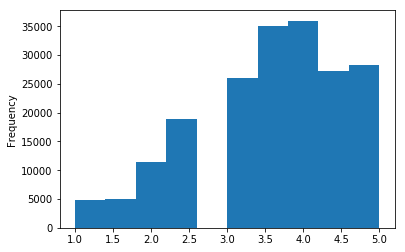

In [40]:
business["stars"].plot.hist()

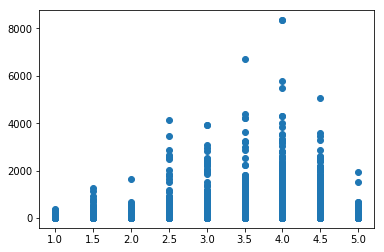

In [45]:
plt.scatter(business["stars"], business["review_count"])